In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# import data
data = pd.read_csv("./pison_data_interview.csv", header=None, names=["timestamp","chan0_raw","chan1_raw","chan0_hp","chan1_hp","quat_x","quat_y","quat_z","quat_w","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z","label","rep"])


In [105]:
data

,timestamp,chan0_raw,chan1_raw,chan0_hp,chan1_hp,quat_x,quat_y,quat_z,quat_w,gyro_x,gyro_y,gyro_z,acc_x,acc_y,acc_z,label,rep
0,1514824.503,12535249,12566283,-11889,17295,0.321960,-0.596619,-0.621826,0.392090,-1.342870,1.063105,0.503576,-0.660156,-10.003906,1.21875,0,1
1,1514827.496,12536264,12559246,-2063,13384,0.321960,-0.596741,-0.621826,0.392029,-1.510729,1.175011,0.000000,-0.660156,-10.003906,1.21875,0,1
2,1514830.493,12538584,12565279,2757,16008,0.321960,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
3,1514833.500,12546745,12567024,7504,5644,0.321960,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
4,1514836.498,12537375,12545467,-3855,-15893,0.321960,-0.596802,-0.621765,0.391907,-1.063105,0.839294,-0.727388,-0.660156,-10.003906,1.21875,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14976,1618167.393,11942866,12916517,-32480,-78200,-0.312927,-0.112427,-0.932861,0.138855,-114.255844,-1219.997200,82.026960,0.363281,-1.464844,-9.00000,4,3
14977,1618170.388,11881160,12934589,-43544,-69885,-0.312927,-0.112427,-0.932861,0.138855,-114.255844,-1219.997200,82.026960,0.363281,-1.464844,-9.00000,4,3
14978,1618173.377,11869705,12927326,-25592,-73242,-0.264465,-0.108093,-0.946472,0.150146,-104.464080,-1181.054100,103.904560,0.363281,-1.464844,-9.00000,4,3
14979,1618176.442,11898127,12957446,40027,-17502,-0.218140,-0.103271,-0.956909,0.161560,-94.336610,-1117.715300,125.782140,0.363281,-1.464844,-9.00000,4,3


In [106]:
data.shape

(14981, 17)

In [107]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14981 entries, 0 to 14980
Data columns (total 17 columns):
timestamp    14981 non-null float64
chan0_raw    14981 non-null int64
chan1_raw    14981 non-null int64
chan0_hp     14981 non-null int64
chan1_hp     14981 non-null int64
quat_x       14981 non-null float64
quat_y       14981 non-null float64
quat_z       14981 non-null float64
quat_w       14981 non-null float64
gyro_x       14981 non-null float64
gyro_y       14981 non-null float64
gyro_z       14981 non-null float64
acc_x        14981 non-null float64
acc_y        14981 non-null float64
acc_z        14981 non-null float64
label        14981 non-null int64
rep          14981 non-null int64
dtypes: float64(11), int64(6)
memory usage: 1.9 MB


,timestamp,chan0_raw,chan1_raw,chan0_hp,chan1_hp,quat_x,quat_y,quat_z,quat_w,gyro_x,gyro_y,gyro_z,acc_x,acc_y,acc_z,label,rep
count,1.498100e+04,1.498100e+04,1.498100e+04,14981.000000,1.498100e+04,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000
mean,1.566353e+06,1.253765e+07,1.251263e+07,62.550898,-2.571735e+02,0.263423,0.051271,0.111606,0.444427,6.407260,5.183960,2.237941,0.564972,-10.547218,2.064593,2.003071,1.991456
std,3.096750e+04,4.158465e+05,5.626673e+05,35397.290087,6.523863e+04,0.320534,0.395624,0.588643,0.335159,119.806613,346.986960,110.392775,7.242565,6.138921,6.852529,1.414352,0.815279
min,1.514825e+06,1.040201e+07,1.021268e+07,-422438.000000,-1.053204e+06,-0.897766,-0.777832,-1.000000,0.000000,-481.754550,-1830.891100,-623.763060,-34.382812,-48.960938,-27.765625,0.000000,1.000000
25%,1.538782e+06,1.245908e+07,1.233564e+07,-9221.000000,-1.041900e+04,0.032471,-0.085632,-0.304993,0.107849,-36.425343,-50.077854,-21.709728,-2.011719,-13.261719,-0.542969,1.000000,1.000000
50%,1.566517e+06,1.256078e+07,1.254805e+07,411.000000,3.980000e+02,0.230042,0.072815,0.036194,0.401611,-0.671435,-0.727388,1.678587,-0.363281,-9.816406,1.457031,2.000000,2.000000
75%,1.594422e+06,1.265877e+07,1.269320e+07,9792.000000,1.127500e+04,0.584961,0.329468,0.712097,0.754333,47.727833,50.413570,39.278942,3.582031,-7.398438,5.097656,3.000000,3.000000
max,1.618179e+06,1.419352e+07,1.504110e+07,640848.000000,1.726175e+06,0.905945,0.738708,1.000000,0.999268,427.312380,1828.317300,425.130220,37.671875,7.691406,33.898438,4.000000,3.000000


#### gravity component clearly visible in acc_y mean

In [84]:
#invert acc_x and acc_y so that orientation of accelerometer readings matches the orientation of quaternion readings

data.acc_x = -data.acc_x
data.acc_y = -data.acc_y

In [85]:
# http://www.varesano.net/blog/fabio/simple-gravity-compensation-9-dom-imus

# compensate the accelerometer readings from gravity. 
# @param q the quaternion representing the orientation of a 9DOM MARG sensor array
# @param acc the readings coming from an accelerometer expressed in g
#
# @return a 3d vector representing dynamic acceleration expressed in g
def gravity_compensate(q, acc):
    g = [0.0, 0.0, 0.0]
  
  # get expected direction of gravity
    g[0] = 2 * (q[1] * q[3] - q[0] * q[2])
    g[1] = 2 * (q[0] * q[1] + q[2] * q[3])
    g[2] = q[0] * q[0] - q[1] * q[1] - q[2] * q[2] + q[3] * q[3]
  
  # compensate accelerometer readings with the expected direction of gravity
    return [acc[0] - g[0], acc[1] - g[1], acc[2] - g[2]]

In [86]:
all_acc = np.array([data.acc_x, data.acc_y, data.acc_z]).T
all_quat = np.array([data.quat_w, data.quat_x, data.quat_y, data.quat_z]).T

In [87]:
# remove gravity component from accelerometer signals
for idx, acc_val in enumerate(all_acc):
    data.loc[[idx], ["acc_x", "acc_y", "acc_z"]] = gravity_compensate(all_quat[idx], all_acc[idx])
    

In [102]:
data.describe()

,timestamp,chan0_raw,chan1_raw,chan0_hp,chan1_hp,quat_x,quat_y,quat_z,quat_w,gyro_x,gyro_y,gyro_z,acc_x,acc_y,acc_z,label,rep,trial
count,1.498100e+04,1.498100e+04,1.498100e+04,14981.000000,1.498100e+04,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000
mean,1.566353e+06,1.253765e+07,1.251263e+07,62.550898,-2.571735e+02,0.263423,0.051271,0.111606,0.444427,6.407260,5.183960,2.237941,-0.537087,9.805735,1.727083,2.003071,1.991456,7.960350
std,3.096750e+04,4.158465e+05,5.626673e+05,35397.290087,6.523863e+04,0.320534,0.395624,0.588643,0.335159,119.806613,346.986960,110.392775,7.183682,6.033640,6.852886,1.414352,0.815279,4.320307
min,1.514825e+06,1.040201e+07,1.021268e+07,-422438.000000,-1.053204e+06,-0.897766,-0.777832,-1.000000,0.000000,-481.754550,-1830.891100,-623.763060,-37.819433,-8.346938,-28.749519,0.000000,1.000000,1.000000
25%,1.538782e+06,1.245908e+07,1.233564e+07,-9221.000000,-1.041900e+04,0.032471,-0.085632,-0.304993,0.107849,-36.425343,-50.077854,-21.709728,-3.550550,6.803145,-0.869822,1.000000,1.000000,4.000000
50%,1.566517e+06,1.256078e+07,1.254805e+07,411.000000,3.980000e+02,0.230042,0.072815,0.036194,0.401611,-0.671435,-0.727388,1.678587,0.392791,8.861856,1.262982,2.000000,2.000000,8.000000
75%,1.594422e+06,1.265877e+07,1.269320e+07,9792.000000,1.127500e+04,0.584961,0.329468,0.712097,0.754333,47.727833,50.413570,39.278942,2.000661,12.329336,4.583197,3.000000,3.000000,12.000000
max,1.618179e+06,1.419352e+07,1.504110e+07,640848.000000,1.726175e+06,0.905945,0.738708,1.000000,0.999268,427.312380,1828.317300,425.130220,33.772444,48.196722,34.033559,4.000000,3.000000,15.000000


In [88]:
# create function to return trial number
def create_trial_vals(row):
    if row["label"] == 0 and row["rep"] == 1:
        return 1
    elif row["label"] == 1 and row["rep"] == 1:
        return 2
    elif row["label"] == 2 and row["rep"] == 1:
        return 3
    elif row["label"] == 3 and row["rep"] == 1:
        return 4
    elif row["label"] == 4 and row["rep"] == 1:
        return 5
    elif row["label"] == 0 and row["rep"] == 2:
        return 6
    elif row["label"] == 1 and row["rep"] == 2:
        return 7
    elif row["label"] == 2 and row["rep"] == 2:
        return 8
    elif row["label"] == 3 and row["rep"] == 2:
        return 9
    elif row["label"] == 4 and row["rep"] == 2:
        return 10
    elif row["label"] == 0 and row["rep"] == 3:
        return 11
    elif row["label"] == 1 and row["rep"] == 3:
        return 12
    elif row["label"] == 2 and row["rep"] == 3:
        return 13
    elif row["label"] == 3 and row["rep"] == 3:
        return 14
    elif row["label"] == 4 and row["rep"] == 3:
        return 15

In [89]:
# add trial feature to dataframe
data["trial"] = data.apply(lambda row: create_trial_vals(row), axis=1)

In [90]:
# for_text_1 = data[(data.trial.isin([1,2,3,4,5,6,7]))]
# for_text_2 = data[(data.trial.isin([8,9,10,11,12,13,14,15]))]
# for_text_1 = for_text_1[["chan0_hp","chan1_hp","quat_x","quat_y","quat_z","quat_w","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z"]]
# for_text_2 = for_text_2[["chan0_hp","chan1_hp","quat_x","quat_y","quat_z","quat_w","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z"]]


In [91]:
# for_text_1.to_csv(f'./outputs/for_text_1.csv', index=False)
# for_text_2.to_csv(f'./outputs/for_text_2.csv', index=False)

In [92]:
data.to_csv(f'./outputs/updated_data_02.csv', index=False)

In [93]:
# save condition indicies to list
standing1 = data.index[data['label'] == 0].tolist()
standing2 = data.index[data['label'] == 1].tolist()
walking = data.index[data['label'] == 2].tolist()
walking_fast = data.index[data['label'] == 3].tolist()
running = data.index[data['label'] == 4].tolist()

conditions = [standing1,standing2,walking,walking_fast,running]

In [94]:
#https://stackoverflow.com/questions/44825950/matplotlib-create-two-subplots-in-line-with-two-y-axes-each

def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()
    ax1.scatter(time, data1, color=c1, s=0.05)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('ADC')
    ax2.scatter(time, data2, color=c2, s=0.05)
    ax2.set_ylabel('ADC HP')
    return ax1, ax2

def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)

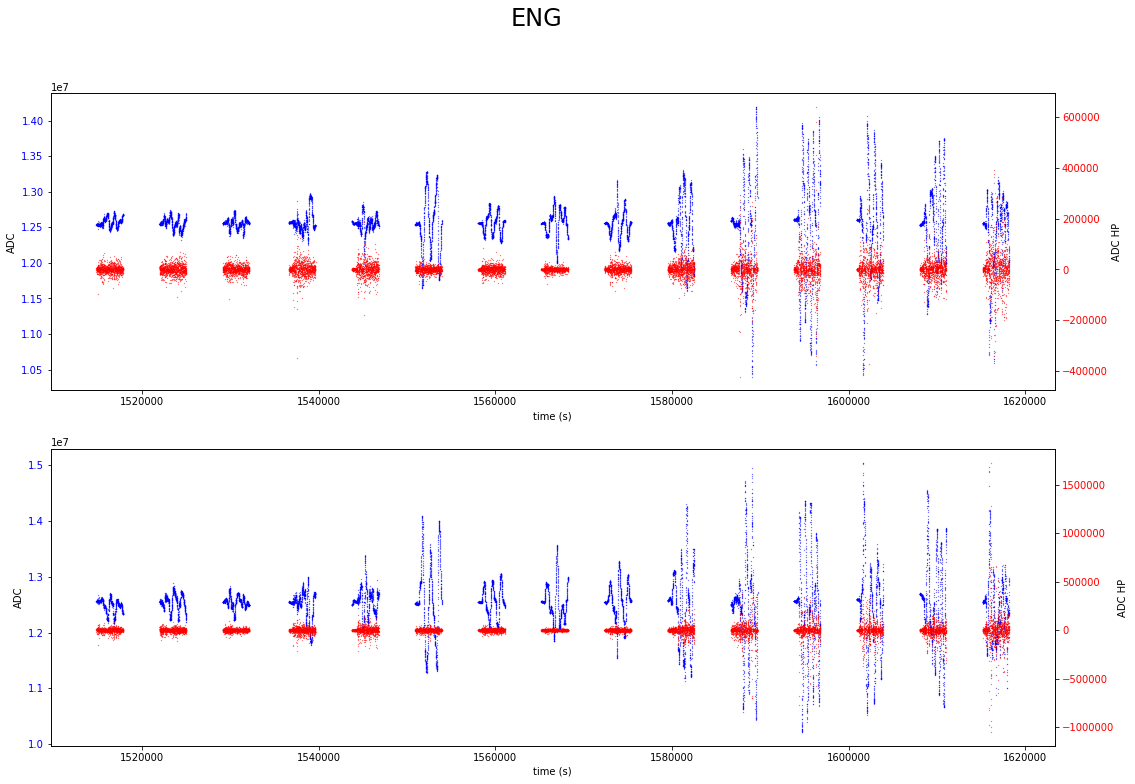

In [95]:
# plot ENG data
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(18,12))
ax1, ax1a = two_scales(ax1, data.timestamp, data.chan0_raw, data.chan0_hp, 'b', 'r')
ax2, ax2a = two_scales(ax2, data.timestamp, data.chan1_raw, data.chan1_hp, 'b', 'r')

color_y_axis(ax1, 'b')
color_y_axis(ax1a, 'r')
color_y_axis(ax2, 'b')
color_y_axis(ax2a, 'r')

fig.suptitle('ENG', fontsize=24)
plt.show()

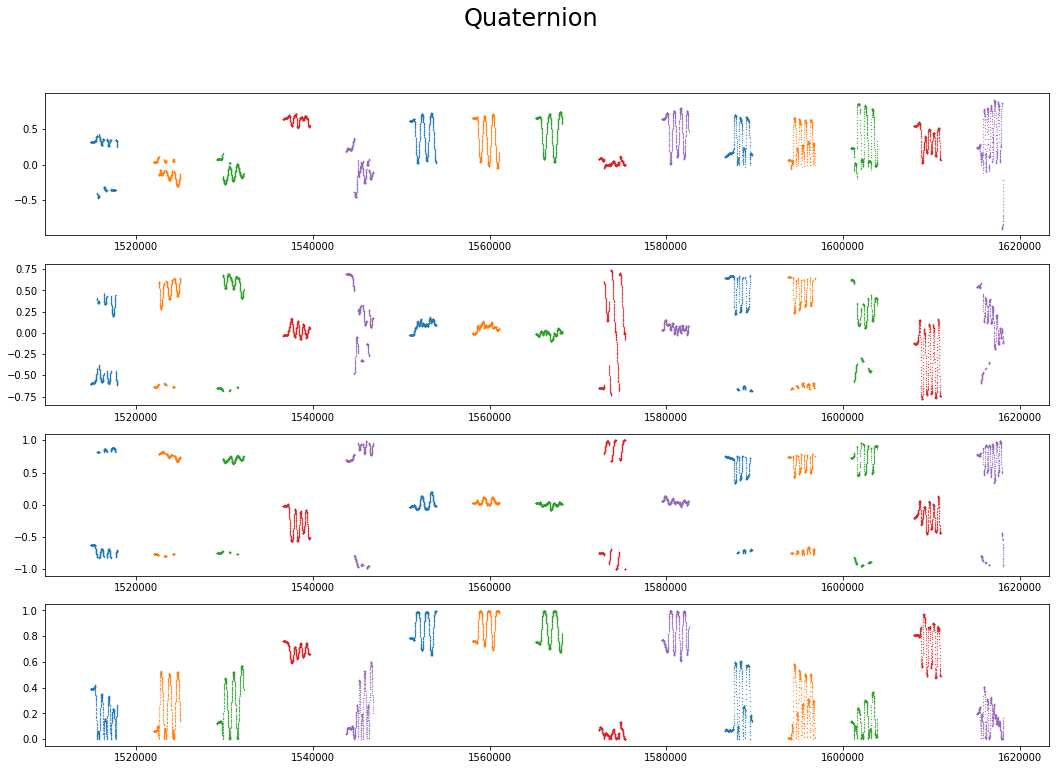

In [96]:
# plot quaternion data by condition
fig, axs = plt.subplots(4, 1, figsize=(18,12))
fig.suptitle('Quaternion', fontsize=24)

for cond in conditions:
    axs[0].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_x, s=0.05)
    axs[1].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_y, s=0.05)
    axs[2].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_z, s=0.05)
    axs[3].scatter(data.iloc[cond].timestamp, data.iloc[cond].quat_w, s=0.05);

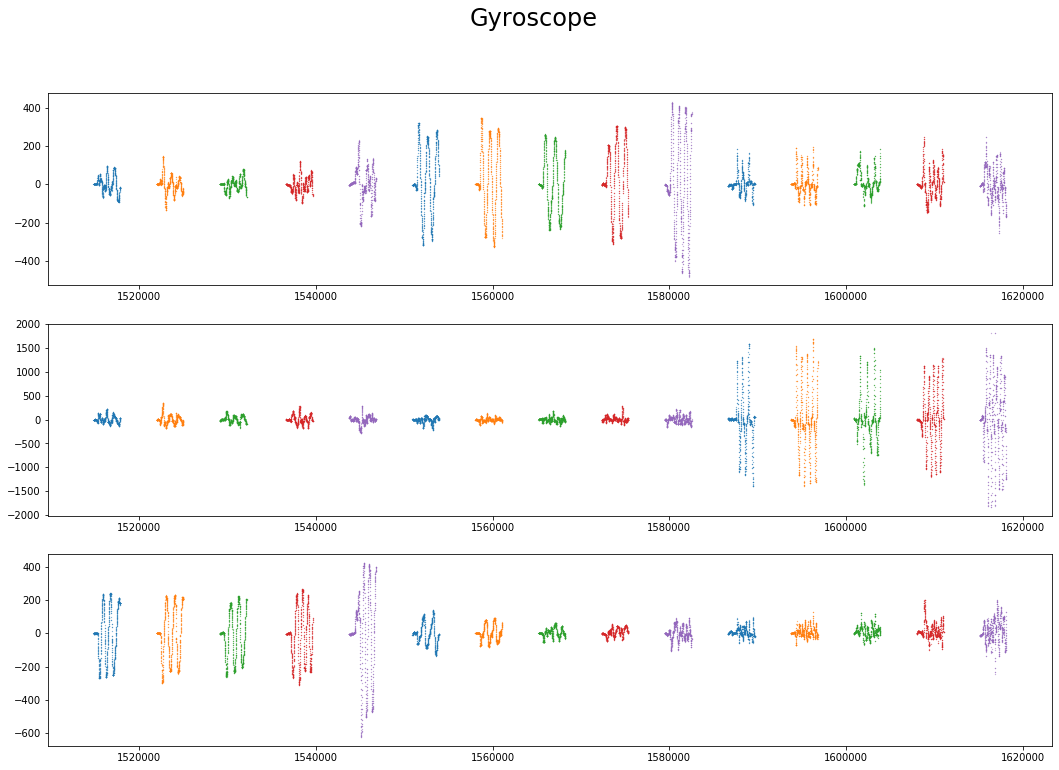

In [97]:
# plot accelerometer data by condition
fig, axs = plt.subplots(3, 1, figsize=(18,12))
fig.suptitle('Gyroscope', fontsize=24)

for cond in conditions:
    axs[0].scatter(data.iloc[cond].timestamp, data.iloc[cond].gyro_x, s=0.05)
    axs[1].scatter(data.iloc[cond].timestamp, data.iloc[cond].gyro_y, s=0.05)
    axs[2].scatter(data.iloc[cond].timestamp, data.iloc[cond].gyro_z, s=0.05);

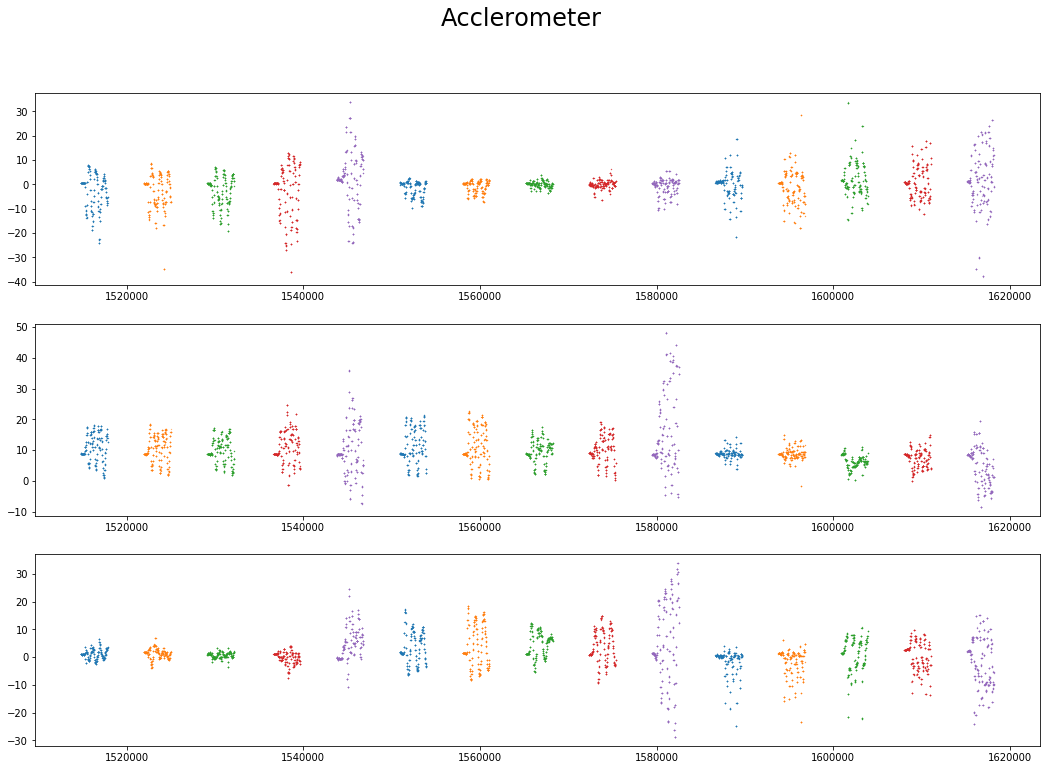

In [98]:
# plot gyroscope data by condition
fig, axs = plt.subplots(3, 1, figsize=(18,12))
fig.suptitle('Acclerometer', fontsize=24)

for cond in conditions:
    axs[0].scatter(data.iloc[cond].timestamp, data.iloc[cond].acc_x, s=0.05)
    axs[1].scatter(data.iloc[cond].timestamp, data.iloc[cond].acc_y, s=0.05)
    axs[2].scatter(data.iloc[cond].timestamp, data.iloc[cond].acc_z, s=0.05);

In [99]:
# concatenate repeated conditions into new dataframes
standing1_df = pd.concat([data[(data.label == 0)]])
standing2_df = pd.concat([data[(data.label == 1)]])
walking_df = pd.concat([data[(data.label == 2)]])
walking_fast_df = pd.concat([data[(data.label == 3)]])
running_df = pd.concat([data[(data.label == 4)]])

standing1_df = standing1_df.reset_index(drop=True)
standing2_df = standing2_df.reset_index(drop=True)
walking_df = walking_df.reset_index(drop=True)
walking_fast_df = walking_fast_df.reset_index(drop=True)
running_df = running_df.reset_index(drop=True)

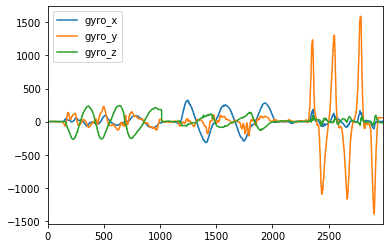

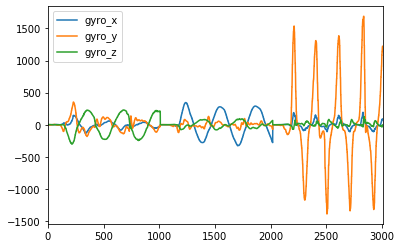

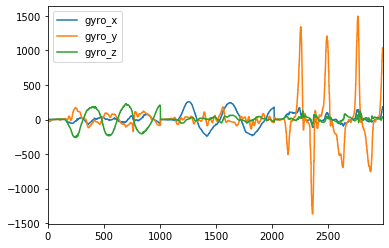

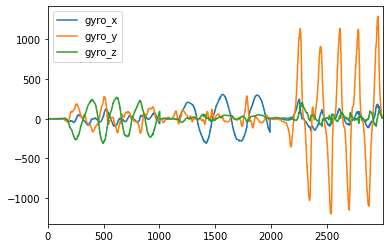

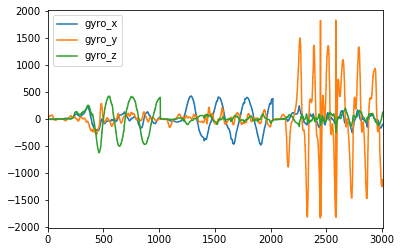

In [100]:
# plot gyroscope data by condition
standing1_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
standing2_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
walking_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
walking_fast_df.plot(None,["gyro_x","gyro_y","gyro_z"]);
running_df.plot(None,["gyro_x","gyro_y","gyro_z"]);

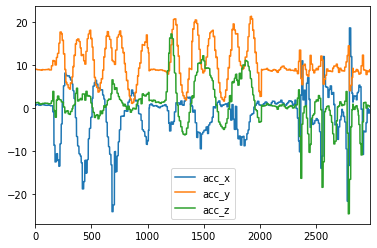

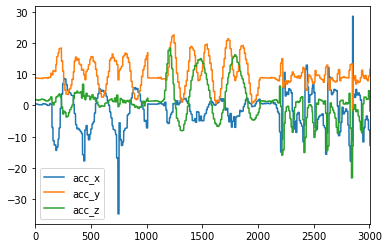

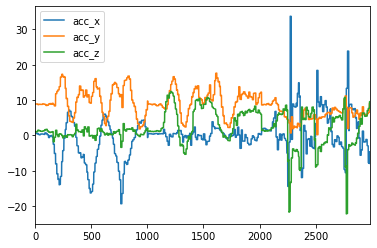

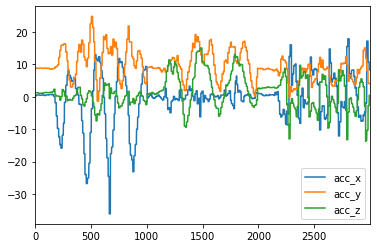

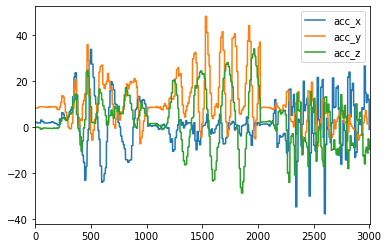

In [101]:
# plot accelerometer data by condition
standing1_df.plot(None,["acc_x","acc_y","acc_z"]);
standing2_df.plot(None,["acc_x","acc_y","acc_z"]);
walking_df.plot(None,["acc_x","acc_y","acc_z"]);
walking_fast_df.plot(None,["acc_x","acc_y","acc_z"]);
running_df.plot(None,["acc_x","acc_y","acc_z"]);